In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('happiness_data.csv')

In [3]:
#Printing the data
df.shape

(1949, 11)

In [4]:
df.head(10)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
5,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
6,Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375
7,Afghanistan,2015,3.983,7.702,0.529,53.20,0.389,0.080,0.881,0.554,0.339
8,Afghanistan,2016,4.220,7.697,0.559,53.00,0.523,0.042,0.793,0.565,0.348
9,Afghanistan,2017,2.662,7.697,0.491,52.80,0.427,-0.121,0.954,0.496,0.371


In [5]:
df['Country name'].nunique()

166

In [6]:
#checking for null values
df.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

In [7]:
df.isnull().mean()*100

Country name                        0.000000
year                                0.000000
Life Ladder                         0.000000
Log GDP per capita                  1.847101
Social support                      0.667009
Healthy life expectancy at birth    2.821960
Freedom to make life choices        1.641868
Generosity                          4.566444
Perceptions of corruption           5.643920
Positive affect                     1.128784
Negative affect                     0.820934
dtype: float64

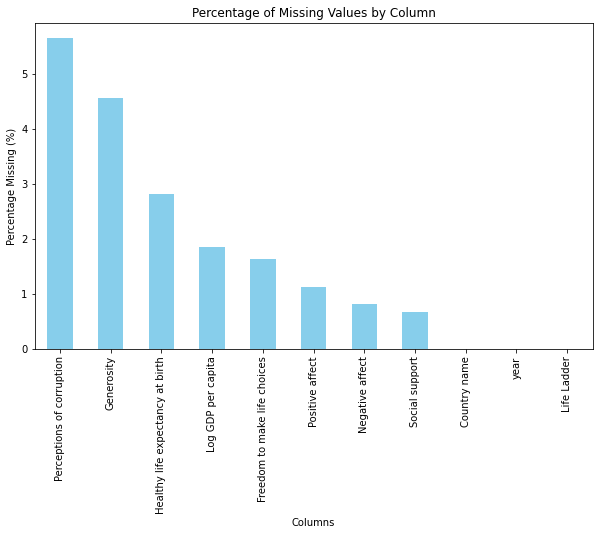

In [8]:
#percentage of missing values in the corresponding column
missing_percentage = (df.isnull().mean() * 100).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing (%)')
plt.xticks(rotation=90)
plt.show()



In [9]:
#Handling NAN values in all columns, not dropping those because the dataset has limited records
#Perceptions of corruption
df[df['Country name'] == 'Algeria']


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
25,Algeria,2010,5.464,9.287,NaN,64.50,0.593,-0.205,0.618,NaN,NaN
26,Algeria,2011,5.317,9.297,0.810,64.66,0.530,-0.181,0.638,0.550,0.255
27,Algeria,2012,5.605,9.311,0.839,64.82,0.587,-0.172,0.690,0.604,0.230
28,Algeria,2014,6.355,9.335,0.818,65.14,NaN,NaN,NaN,0.626,0.177
29,Algeria,2016,5.341,9.362,0.749,65.50,NaN,NaN,NaN,0.661,0.377
30,Algeria,2017,5.249,9.354,0.807,65.70,0.437,-0.167,0.700,0.642,0.289
31,Algeria,2018,5.043,9.348,0.799,65.90,0.583,-0.146,0.759,0.591,0.293
32,Algeria,2019,4.745,9.337,0.803,66.10,0.385,0.005,0.741,0.585,0.215


In [10]:
df['Generosity'] = df.groupby('Country name')['Generosity'].transform(lambda x: x.fillna(x.mean()))
df['Freedom to make life choices'] = df.groupby('Country name')['Freedom to make life choices'].transform(lambda x: x.fillna(x.mean()))
df['Perceptions of corruption'] = df.groupby('Country name')['Perceptions of corruption'].transform(lambda x: x.fillna(x.mean()))
df['Positive affect']=df.groupby('Country name')['Positive affect'].transform(lambda x: x.fillna(x.mean()))
df['Negative affect']=df.groupby('Country name')['Negative affect'].transform(lambda x: x.fillna(x.mean()))
df['Healthy life expectancy at birth']=df.groupby('Country name')['Healthy life expectancy at birth'].transform(lambda x: x.fillna(x.mean()))
df['Log GDP per capita']=df.groupby('Country name')['Log GDP per capita'].transform(lambda x: x.fillna(x.mean()))
df['Social support']=df.groupby('Country name')['Social support'].transform(lambda x: x.fillna(x.mean()))


In [11]:
df.isnull().mean()*100

Country name                        0.000000
year                                0.000000
Life Ladder                         0.000000
Log GDP per capita                  0.974859
Social support                      0.051308
Healthy life expectancy at birth    1.847101
Freedom to make life choices        0.000000
Generosity                          0.974859
Perceptions of corruption           1.436634
Positive affect                     0.102617
Negative affect                     0.051308
dtype: float64

In [12]:
rows_with_nan = df[df.isna().any(axis=1)]

In [13]:
df.dropna(inplace=True)

In [14]:
df.shape


(1878, 11)

In [15]:
df.isnull().mean()*100

Country name                        0.0
year                                0.0
Life Ladder                         0.0
Log GDP per capita                  0.0
Social support                      0.0
Healthy life expectancy at birth    0.0
Freedom to make life choices        0.0
Generosity                          0.0
Perceptions of corruption           0.0
Positive affect                     0.0
Negative affect                     0.0
dtype: float64

In [16]:
df.head(10)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
5,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
6,Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375
7,Afghanistan,2015,3.983,7.702,0.529,53.20,0.389,0.080,0.881,0.554,0.339
8,Afghanistan,2016,4.220,7.697,0.559,53.00,0.523,0.042,0.793,0.565,0.348
9,Afghanistan,2017,2.662,7.697,0.491,52.80,0.427,-0.121,0.954,0.496,0.371


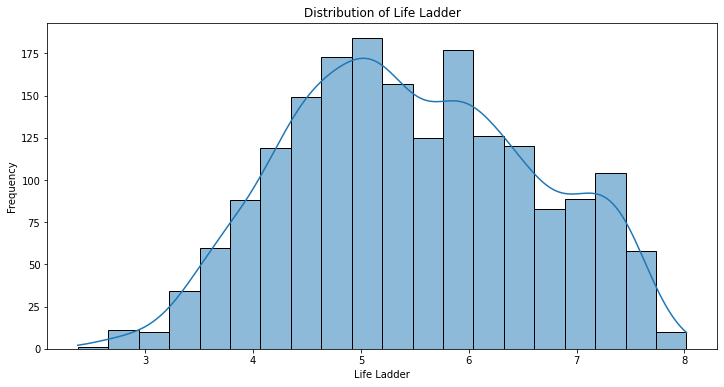

In [17]:
#Distribution of dependent variable
plt.figure(figsize=(12, 6))
sns.histplot(df['Life Ladder'], bins=20, kde=True)
plt.title('Distribution of Life Ladder')
plt.xlabel('Life Ladder')
plt.ylabel('Frequency')
plt.show()

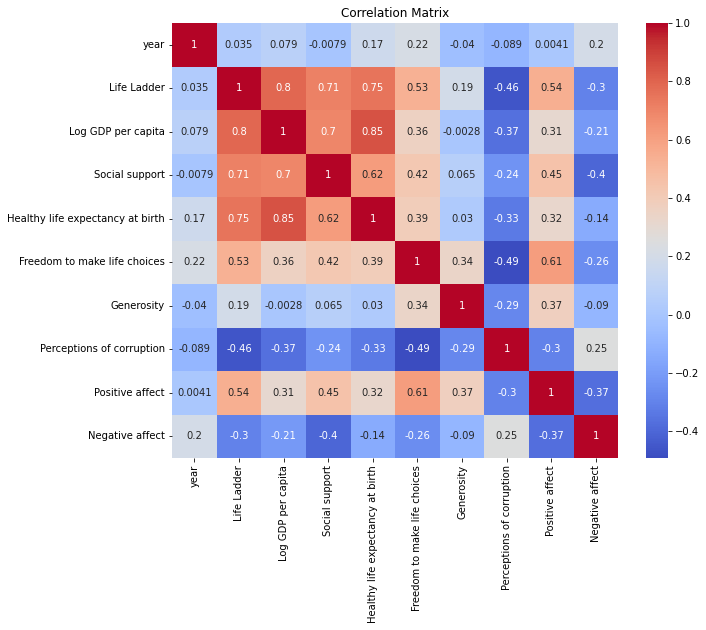

In [18]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [19]:
df.head(1)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.37,0.451,50.8,0.718,0.168,0.882,0.518,0.258


In [20]:
#Life Ladder top 10 and bottom 10
mean_life_ladder = df.groupby('Country name')['Life Ladder'].mean()
top_10_high_life_ladder = mean_life_ladder.nlargest(10)
bottom_10_low_life_ladder = mean_life_ladder.nsmallest(10)
print("Top 10 countries with highest mean life expectancy:")
print(top_10_high_life_ladder)
print("\nBottom 10 countries with lowest mean life expectancy:")
print(bottom_10_low_life_ladder)

Top 10 countries with highest mean life expectancy:
Country name
Denmark        7.680400
Finland        7.597154
Switzerland    7.548300
Norway         7.512400
Netherlands    7.466286
Iceland        7.446500
Canada         7.376333
Sweden         7.369467
New Zealand    7.310286
Australia      7.282071
Name: Life Ladder, dtype: float64

Bottom 10 countries with lowest mean life expectancy:
Country name
Central African Republic    3.515000
Burundi                     3.548200
Togo                        3.555000
Afghanistan                 3.594667
Rwanda                      3.654417
Tanzania                    3.697333
Zimbabwe                    3.882600
Yemen                       3.912250
Comoros                     3.944000
Haiti                       3.954182
Name: Life Ladder, dtype: float64


In [21]:
df['year'] = pd.to_numeric(df['year'])
happiness_change = df.groupby('Country name')['Life Ladder'].last() - df.groupby('Country name')['Life Ladder'].first()
countries_with_increase = happiness_change[happiness_change > 0]
countries_with_decrease = happiness_change[happiness_change < 0]
print("Countries with happiness increase:")
print(countries_with_increase.nlargest(10))
print("\nCountries with happiness decrease:")
print(countries_with_decrease.nsmallest(10))



Countries with happiness increase:
Country name
Bulgaria               1.754
Nicaragua              1.653
Kyrgyzstan             1.609
Latvia                 1.519
Georgia                1.448
Liberia                1.420
Mongolia               1.402
Congo (Brazzaville)    1.393
Cameroon               1.390
Serbia                 1.292
Name: Life Ladder, dtype: float64

Countries with happiness decrease:
Country name
Venezuela     -2.596
Jordan        -2.201
Syria         -1.861
Angola        -1.794
Lebanon       -1.467
Lesotho       -1.386
Afghanistan   -1.349
Botswana      -1.268
India         -1.123
Rwanda        -0.947
Name: Life Ladder, dtype: float64


In [22]:
!pip install statsmodels

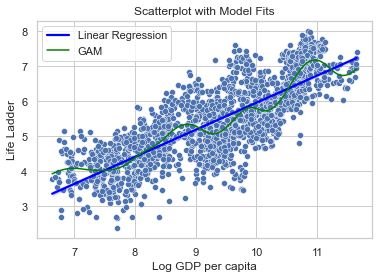

In [23]:
#Studying the cause effect of life ladder and Log GDP per capita
import seaborn as sns
import matplotlib.pyplot as plt
from pygam import LinearGAM

# Scatterplot
sns.set(style="whitegrid")
sns.scatterplot(x="Log GDP per capita", y="Life Ladder", data=df)

# Linear Regression
sns.regplot(x="Log GDP per capita", y="Life Ladder", data=df, scatter=False, color='blue', label='Linear Regression')

X = df[['Log GDP per capita']]
y = df['Life Ladder']
gam = LinearGAM().fit(X, y)
X_grid = gam.generate_X_grid(term=0)
y_pred = gam.predict(X_grid)
plt.plot(X_grid, y_pred, color='green', label='GAM')

plt.legend()
plt.xlabel('Log GDP per capita')
plt.ylabel('Life Ladder')
plt.title('Scatterplot with Model Fits')
plt.show()



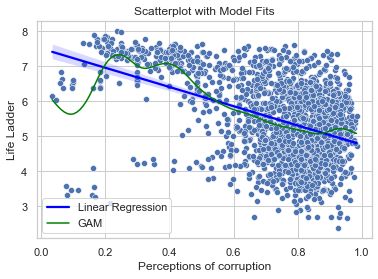

In [24]:
#Studying the cause effect of life ladder and Perceptions of corruptions
import seaborn as sns
import matplotlib.pyplot as plt
from pygam import LinearGAM

# Scatterplot
sns.set(style="whitegrid")
sns.scatterplot(x="Perceptions of corruption", y="Life Ladder", data=df)

# Linear Regression
sns.regplot(x="Perceptions of corruption", y="Life Ladder", data=df, scatter=False, color='blue', label='Linear Regression')

X = df[['Perceptions of corruption']]
y = df['Life Ladder']
gam = LinearGAM().fit(X, y)
X_grid = gam.generate_X_grid(term=0)
y_pred = gam.predict(X_grid)
plt.plot(X_grid, y_pred, color='green', label='GAM')

plt.legend()
plt.xlabel('Perceptions of corruption')
plt.ylabel('Life Ladder')
plt.title('Scatterplot with Model Fits')
plt.show()

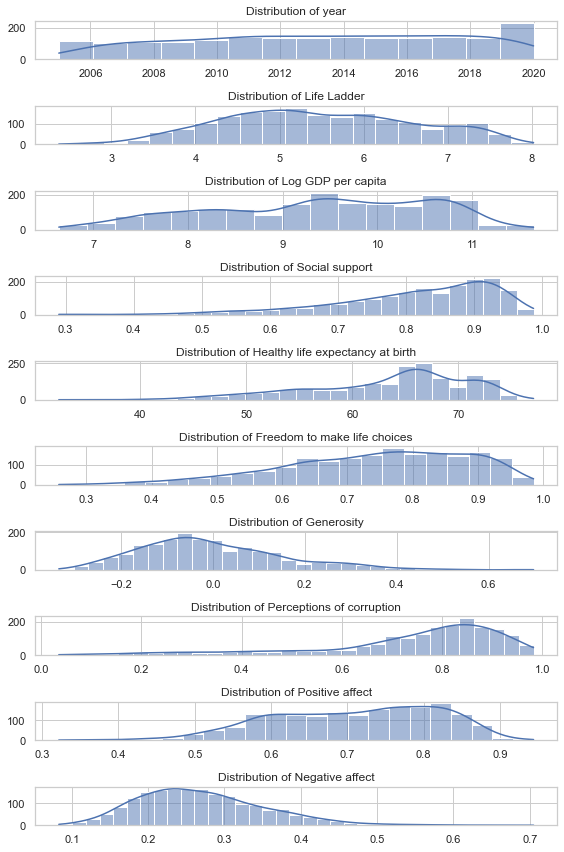

In [25]:
#PLotting Histograms
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
summary_stats = df.describe()
numerical_attributes = df.select_dtypes(include=['float64', 'int64'])  # Select numerical columns
fig, axes = plt.subplots(nrows=len(numerical_attributes.columns), ncols=1, figsize=(8, 12))
for i, col in enumerate(numerical_attributes.columns):
    sns.histplot(data=numerical_attributes, x=col, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
plt.tight_layout()
plt.show()



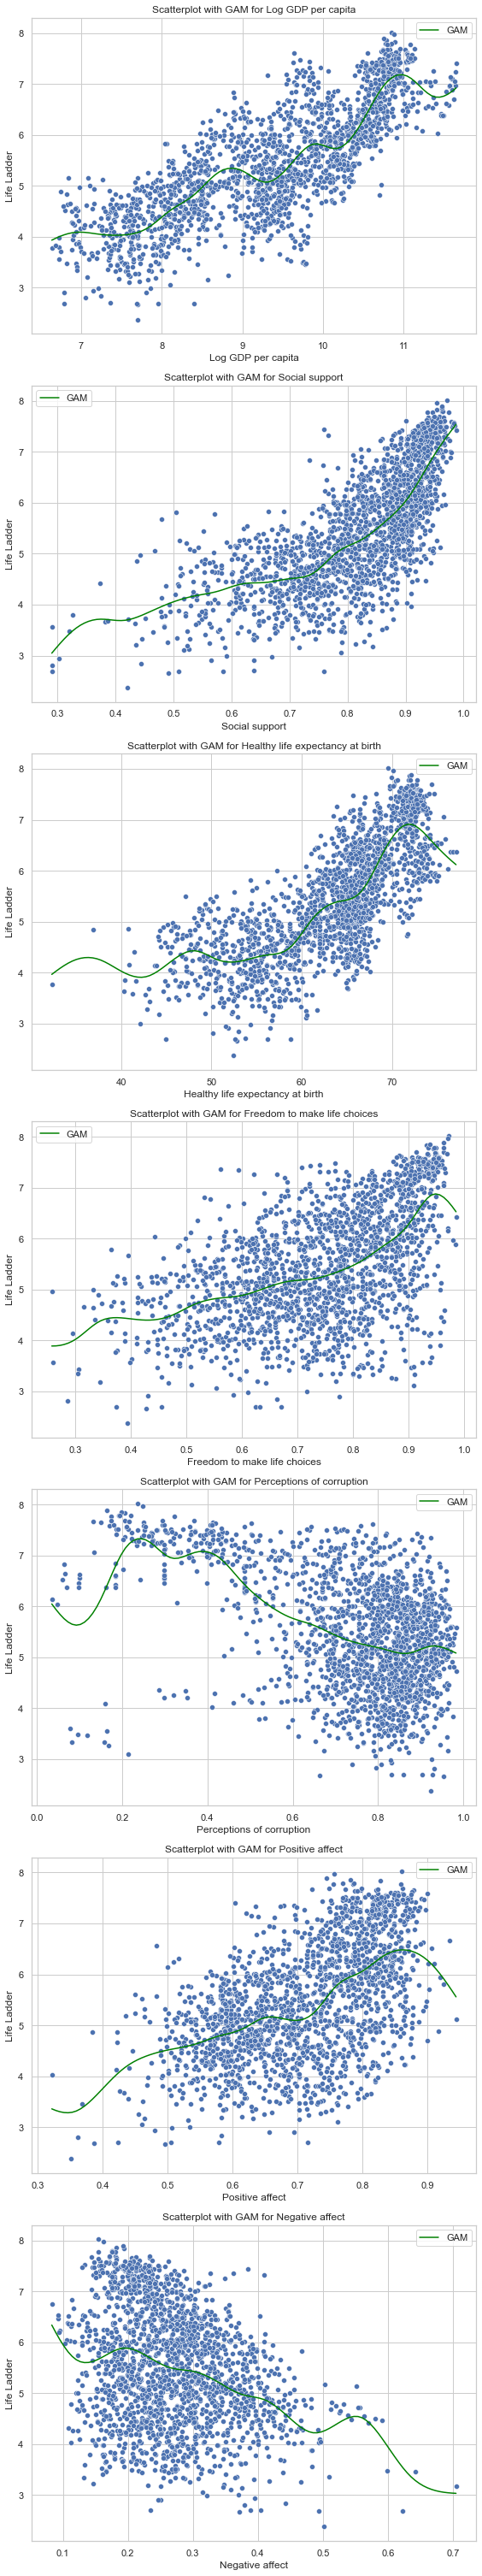

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pygam import LinearGAM

# Assuming you have already loaded your dataset into df

correlation_matrix = df.corr()
pcc_with_label = correlation_matrix['Life Ladder'].drop('Life Ladder')  
significant_attributes = pcc_with_label[abs(pcc_with_label) > 0.2]  

fig, axes = plt.subplots(nrows=len(significant_attributes), ncols=1, figsize=(8, 6 * len(significant_attributes)))

for i, attr in enumerate(significant_attributes.index):
    sns.scatterplot(data=df, x=attr, y='Life Ladder', ax=axes[i])
    X = df[[attr]]
    y = df['Life Ladder']
    gam = LinearGAM().fit(X, y)
    X_grid = gam.generate_X_grid(term=0)
    y_pred = gam.predict(X_grid)
    axes[i].plot(X_grid, y_pred, color='green', label='GAM')
    
    axes[i].legend()
    axes[i].set_xlabel(attr)
    axes[i].set_ylabel('Life Ladder')
    axes[i].set_title(f'Scatterplot with GAM for {attr}')
   
plt.tight_layout()
plt.show()


In [27]:
!pip install geopandas matplotlib


c:\Users\Chintan\Anaconda3\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


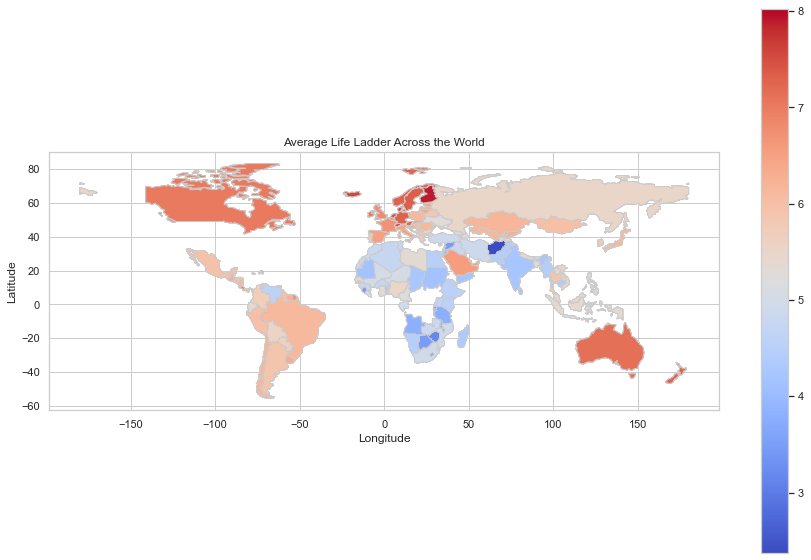

In [28]:
import geopandas as gpd
import matplotlib.pyplot as plt
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged_data = world.merge(df, left_on='name', right_on='Country name', how='left')
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column='Life Ladder', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title("Average Life Ladder Across the World")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()



In [29]:
df.head(10)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
5,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
6,Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375
7,Afghanistan,2015,3.983,7.702,0.529,53.20,0.389,0.080,0.881,0.554,0.339
8,Afghanistan,2016,4.220,7.697,0.559,53.00,0.523,0.042,0.793,0.565,0.348
9,Afghanistan,2017,2.662,7.697,0.491,52.80,0.427,-0.121,0.954,0.496,0.371


In [30]:
#Getting Dummy Values
df = pd.get_dummies(df, columns=['Country name'], drop_first=True)

In [31]:
df.shape

(1878, 164)

In [32]:
df.drop(columns=['year'], inplace=True)


In [33]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Life Ladder'])
y = df['Life Ladder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [36]:
y_pred = model.predict(X_test)

In [37]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.35335572503480006


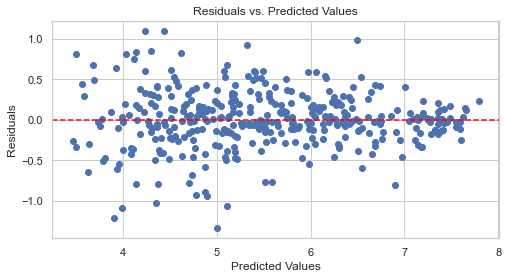

In [38]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 4))
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.axhline(0, color='red', linestyle='--')
plt.show()


In [39]:
import pandas as pd

# Create a DataFrame to display y_test and y_pred
results_df = pd.DataFrame({'Actual (y_test)': y_test, 'Predicted (y_pred)': y_pred})
print(results_df)


      Actual (y_test)  Predicted (y_pred)
1153            5.455            5.159637
1498            4.461            4.876183
1376            5.701            5.818093
834             4.543            4.514763
270             3.674            4.090116
...               ...                 ...
1826            6.869            7.110797
339             6.436            6.444517
889             6.168            6.008415
1606            6.291            6.364541
629             3.860            4.783563

[376 rows x 2 columns]


In [40]:
coefficients = model.coef_
intercept = model.intercept_

print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")

Coefficients: [ 1.03231410e+00  1.61876748e-01 -1.64610885e-01  6.60275127e-02
  6.89119986e-02 -9.07969373e-02  1.54718922e-01 -8.05976065e-02
 -1.82010667e-02  1.23203674e-02 -3.10520014e-02 -3.36755868e-03
 -2.37756833e-02 -1.08656567e-02 -1.56927412e-02 -5.26514177e-02
 -7.08389615e-02  5.01252096e-02 -3.13498638e-02 -1.71819766e-02
  2.55747210e-02  7.31222410e-03 -3.43697023e-02  4.57686221e-02
 -5.95444388e-03 -1.80019159e-01  5.36563843e-02 -9.21061635e-02
  2.06675591e-02  4.13310442e-02 -3.55276304e-02  7.49047179e-03
 -1.40634249e-03  2.66064708e-02  2.68613864e-02  1.61106774e-03
  2.91333801e-02 -2.44814238e-02  3.03271980e-02  6.29603849e-02
  7.89038291e-02 -2.39788099e-02 -1.74450075e-02 -1.74643628e-04
 -3.37411248e-03  3.97415525e-03 -7.20654825e-02  4.63543480e-03
 -5.26860737e-02  5.72374147e-02 -8.62081895e-02  2.22181905e-02
  1.60330005e-02 -2.13173162e-02 -8.19718098e-02  1.37326959e-02
 -5.98826810e-02 -3.15900541e-02  6.96861203e-03 -3.64622040e-02
  5.9075319

In [41]:
import statsmodels.api as sm


X_train_sm = sm.add_constant(X_train)  # Add a constant term for the intercept
model_sm = sm.OLS(y_train, X_train_sm).fit()


r_squared = model_sm.rsquared
adj_r_squared = model_sm.rsquared_adj

print(f"R-squared: {r_squared:.4f}")
print(f"Adjusted R-squared: {adj_r_squared:.4f}")
print(model_sm.summary())


R-squared: 0.9115
Adjusted R-squared: 0.9008
                            OLS Regression Results                            
Dep. Variable:            Life Ladder   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     85.16
Date:                Tue, 19 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:38:21   Log-Likelihood:                -495.80
No. Observations:                1502   AIC:                             1318.
Df Residuals:                    1339   BIC:                             2184.
Df Model:                         162                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

In [42]:
# Creating Multiple Linear Regression Models

In [43]:
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [44]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [45]:
# print the intercept
print(lin_reg.intercept_)

5.459260319573901


In [46]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Log GDP per capita,1.032314
Social support,0.161877
Healthy life expectancy at birth,-0.164611
Freedom to make life choices,0.066028
Generosity,0.068912
...,...
Country name_Venezuela,0.007213
Country name_Vietnam,0.028774
Country name_Yemen,-0.017780
Country name_Zambia,-0.012104


In [47]:
pred = lin_reg.predict(X_test)

In [54]:
!pip install hvplot --user

In [56]:
from sklearn import metrics
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 0.25586766013541
MSE: 0.12486026841486923
RMSE: 0.35335572503480006
R2 Square 0.8991802347421283
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.2537895297548423
MSE: 0.11330223301751362
RMSE: 0.3366039705908319
R2 Square 0.9115311272423232
__________________________________


In [57]:
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Robust Regression", *evaluate(y_test, test_pred) , cross_val(RANSACRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 24806981884233.688
MSE: 4.871778142718995e+27
RMSE: 69798124206306.54
R2 Square -3.9337696047982185e+27
__________________________________
Train set evaluation:
_____________________________________
MAE: 20328583630247.402
MSE: 4.120337430154624e+27
RMSE: 64189854573402.984
R2 Square -3.2172499880977345e+27
__________________________________


In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Assuming you have your data in X_train, X_test, y_train, y_test
alphas = [0.1, 1, 10, 100, 1000]
ridge = Ridge()
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_alpha = grid_search.best_params_['alpha']
best_ridge = Ridge(alpha=best_alpha, solver='cholesky', tol=0.0001, random_state=42)
best_ridge.fit(X_train, y_train)
test_pred = best_ridge.predict(X_test)
results_df = pd.DataFrame(data=[["Ridge Regression (Best Alpha)", mean_absolute_error(y_test, test_pred), mean_squared_error(y_test, test_pred), np.sqrt(mean_squared_error(y_test, test_pred)), r2_score(y_test, test_pred), np.mean(cross_val_score(best_ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))]], columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Ridge Regression (Best Alpha),0.25591,0.124925,0.353447,0.899128,-0.155209


In [59]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 0.4349797800444356
MSE: 0.30692760300720584
RMSE: 0.5540104719291918
R2 Square 0.7521680092539135
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.4517433951725826
MSE: 0.32518502494160073
RMSE: 0.5702499670684784
R2 Square 0.7460883883037546
__________________________________


In [60]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 0.41432627391909527
MSE: 0.2788153062971382
RMSE: 0.5280296452824768
R2 Square 0.774867585277179
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.4349641888768056
MSE: 0.2985311176093597
RMSE: 0.5463800120880702
R2 Square 0.7669003447274771
__________________________________


In [61]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)


Test set evaluation:
_____________________________________
MAE: 0.2921210992112495
MSE: 0.1500090508034033
RMSE: 0.38731001898143985
R2 Square 0.8788735801984371
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.27451691426877445
MSE: 0.13246578234729245
RMSE: 0.36395848986840856
R2 Square 0.8965678069079428
__________________________________


In [64]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 0.27052146276595856
MSE: 0.1305036257501338
RMSE: 0.36125285569824056
R2 Square 0.894623445228292
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.10231792876165383
MSE: 0.018208557195294153
RMSE: 0.13493908698110474
R2 Square 0.9857823585051289
__________________________________


In [65]:
### questions 

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a Linear Regression model
lr_model = LinearRegression()

# Perform 4-fold cross-validation and calculate metrics
scores = cross_val_score(lr_model, X_train, y_train, cv=4, scoring='neg_mean_squared_error')
mse_scores = -scores  # Convert negative MSE scores to positive

# Calculate RMSE and R2 Score
rmse_scores = np.sqrt(mse_scores)
r2_scores = cross_val_score(lr_model, X_train, y_train, cv=4, scoring='r2')

# Print and analyze the results
print("Cross-Validation RMSE Scores:", rmse_scores)
print("Cross-Validation R2 Scores:", r2_scores)


Cross-Validation RMSE Scores: [3.94304122e-01 5.90547795e+11 4.01147227e-01 2.40040928e+12]
Cross-Validation R2 Scores: [ 8.73411793e-01 -2.60262981e+23  8.72497671e-01 -4.48199605e+24]


In [67]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Create models with different regularization terms (alpha values)
ridge_model = Ridge(alpha=0.1)
lasso_model = Lasso(alpha=0.1)
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Fit the models and evaluate
ridge_scores = cross_val_score(ridge_model, X_train, y_train, cv=4, scoring='neg_mean_squared_error')
lasso_scores = cross_val_score(lasso_model, X_train, y_train, cv=4, scoring='neg_mean_squared_error')
elasticnet_scores = cross_val_score(elasticnet_model, X_train, y_train, cv=4, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive and calculate RMSE
ridge_rmse_scores = np.sqrt(-ridge_scores)
lasso_rmse_scores = np.sqrt(-lasso_scores)
elasticnet_rmse_scores = np.sqrt(-elasticnet_scores)

# Print and analyze the results
print("Ridge RMSE Scores:", ridge_rmse_scores)
print("Lasso RMSE Scores:", lasso_rmse_scores)
print("Elastic Net RMSE Scores:", elasticnet_rmse_scores)


Ridge RMSE Scores: [0.39420354 0.4035235  0.40035527 0.38103975]
Lasso RMSE Scores: [0.55860513 0.56594618 0.55687085 0.56565885]
Elastic Net RMSE Scores: [0.49374926 0.51390281 0.50077604 0.52889548]


In [69]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

# Define the batch size (e.g., 32, 64, or any suitable value)
batch_size = 32

# Create an SGDRegressor model with desired hyperparameters (e.g., learning rate)
sgd_model = SGDRegressor(learning_rate='constant', eta0=0.01, max_iter=1000)

# Initialize lists to store training and validation losses
train_losses, val_losses = [], []

# Training loop with minibatch SGD
for epoch in range(100):
    for i in range(0, len(X_train), batch_size):
        X_batch, y_batch = X_train[i:i+batch_size], y_train[i:i+batch_size]
        sgd_model.partial_fit(X_batch, y_batch)

    # Calculate training loss
    train_loss = mean_squared_error(y_train, sgd_model.predict(X_train))
    train_losses.append(train_loss)

    # Calculate validation loss
    val_loss = mean_squared_error(y_val, sgd_model.predict(X_val))
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1}: Train Loss = {train_loss:.4f}, Validation Loss = {val_loss:.4f}")


NameError: name 'y_val' is not defined